## Data Analysis3 Assignment-1 Jo Kudo


### Import libraries

In [13]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
import os
from plotnine import *
import numpy as np
import sys
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer import stargazer
from statsmodels.tools.eval_measures import mse,rmse

### Loading Data

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/Jk33033/Data_Analysis3/main/assignment1/morg-2014-emp.csv")
df

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
0,3,2600310997690,January,AL,3151.6801,1692.00,40,43,1,NaN,...,0,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work
1,5,75680310997590,January,AL,3457.1138,450.00,40,41,2,NaN,...,2,6,"Native, Born In US",63,Outpatient care centers (6214),5400,"Private, For Profit",No,No,Employed-Absent
2,6,75680310997590,January,AL,3936.9110,1090.00,60,41,2,NaN,...,2,6,"Native, Born In US",63,Motor vehicles and motor vehicle equipment man...,8140,"Private, For Profit",No,No,Employed-At Work
3,10,179140131100930,January,AL,3288.3640,769.23,40,40,1,NaN,...,2,4,"Native, Born In US",63,"**Publishing, except newspapers and software (...",8255,"Private, For Profit",Yes,NaN,Employed-At Work
4,11,179140131100930,January,AL,3422.8500,826.92,40,43,1,NaN,...,2,4,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",5940,"Private, For Profit",No,No,Employed-At Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149311,317051,896679860459501,December,WY,346.2296,692.30,40,39,1,NaN,...,0,0,"Native, Born In US",8,Office supplies and stationery stores (45321),4760,"Private, For Profit",No,No,Employed-At Work
149312,317052,907086820569600,December,WY,294.9800,1984.61,40,44,1,NaN,...,1,3,"Native, Born In US",8,Administration of human resource programs (923),430,Government - State,No,No,Employed-At Work
149313,317053,907086820569600,December,WY,324.1761,2884.61,55,43,1,NaN,...,1,3,"Native, Born In US",8,Nursing care facilities (6231),10,"Private, For Profit",No,No,Employed-At Work
149314,317055,950868097156649,December,WY,321.6982,1153.84,40,42,1,NaN,...,0,0,"Native, Born In US",8,Hospitals (622),5820,"Private, Nonprofit",No,No,Employed-At Work


### Select Occupation: Personal Care and Service Occupations

In [15]:
data = df.loc[((df["occ2012"] >= 4300) & (df["occ2012"] <= 4650))]
data.describe()

,Unnamed: 0,hhid,weight,earnwke,uhours,grade92,race,ethnic,age,sex,marital,ownchild,chldpres,occ2012
count,4350.000000,4.350000e+03,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,619.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000
mean,158316.767126,4.524965e+14,2406.138897,458.244972,33.354483,40.012184,1.596782,2.924071,37.427586,1.769885,4.274253,0.566897,1.573103,4547.657471
std,91185.348431,3.204006e+14,1303.166668,365.171003,13.004283,2.115994,1.514911,2.501595,13.613888,0.420955,2.737030,0.985994,2.952224,92.510811
min,128.000000,1.765610e+10,128.694800,1.000000,1.000000,31.000000,1.000000,1.000000,16.000000,1.000000,1.000000,0.000000,0.000000,4300.000000
25%,80526.500000,1.401513e+14,1264.143200,230.760000,25.000000,39.000000,1.000000,1.000000,25.000000,2.000000,1.000000,0.000000,0.000000,4510.000000
50%,158899.500000,4.251351e+14,2702.789800,378.100000,40.000000,40.000000,1.000000,1.000000,36.000000,2.000000,5.000000,0.000000,0.000000,4600.000000
75%,238386.750000,7.239546e+14,3358.488650,576.000000,40.000000,41.000000,2.000000,5.000000,49.000000,2.000000,7.000000,1.000000,3.000000,4610.000000
max,317005.000000,9.999904e+14,7606.269500,2884.610000,99.000000,46.000000,25.000000,8.000000,64.000000,2.000000,7.000000,7.000000,15.000000,4650.000000


### EDA

In [16]:
# SAMPLE DESIGN

# Manage missing
data["weight"] = data["weight"].fillna("Missing")
data["earnwke"] = data["earnwke"].fillna("Missing")
data["uhours"] = data["uhours"].fillna("Missing")
data["grade92"] = data["grade92"].fillna("Missing")
data["age"] = data["age"].fillna("Missing")
data["sex"] = data["sex"].fillna("Missing")

In [17]:
# check frequency by gender
# 1 stands for male , 2 stands for female
freq = data.groupby("sex").agg(frequency=("earnwke", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
sex,,,
1,1001,23.011,23.011
2,3349,76.989,100.000


### Add some variables needed to make models afterwards

In [18]:
data["w"] = data["earnwke"] / data["uhours"] #wage is earning a week divided by usual working hours
data["agesq"] = np.power(data["age"], 2)
data["grade92sq"] = np.power(data["grade92"], 2)
data["female"] = (data["sex"] == 2) # make dummy variables regarding gender
data.describe()

,Unnamed: 0,hhid,weight,earnwke,uhours,grade92,race,ethnic,age,sex,marital,ownchild,chldpres,occ2012,w,agesq,grade92sq
count,4350.000000,4.350000e+03,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,619.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000
mean,158316.767126,4.524965e+14,2406.138897,458.244972,33.354483,40.012184,1.596782,2.924071,37.427586,1.769885,4.274253,0.566897,1.573103,4547.657471,13.614158,1586.119540,1605.451264
std,91185.348431,3.204006e+14,1303.166668,365.171003,13.004283,2.115994,1.514911,2.501595,13.613888,0.420955,2.737030,0.985994,2.952224,92.510811,10.262829,1074.355512,167.392162
min,128.000000,1.765610e+10,128.694800,1.000000,1.000000,31.000000,1.000000,1.000000,16.000000,1.000000,1.000000,0.000000,0.000000,4300.000000,0.041667,256.000000,961.000000
25%,80526.500000,1.401513e+14,1264.143200,230.760000,25.000000,39.000000,1.000000,1.000000,25.000000,2.000000,1.000000,0.000000,0.000000,4510.000000,8.653750,625.000000,1521.000000
50%,158899.500000,4.251351e+14,2702.789800,378.100000,40.000000,40.000000,1.000000,1.000000,36.000000,2.000000,5.000000,0.000000,0.000000,4600.000000,11.000000,1296.000000,1600.000000
75%,238386.750000,7.239546e+14,3358.488650,576.000000,40.000000,41.000000,2.000000,5.000000,49.000000,2.000000,7.000000,1.000000,3.000000,4610.000000,15.000000,2401.000000,1681.000000
max,317005.000000,9.999904e+14,7606.269500,2884.610000,99.000000,46.000000,25.000000,8.000000,64.000000,2.000000,7.000000,7.000000,15.000000,4650.000000,214.200000,4096.000000,2116.000000


### Making Model 1-4

4 models are made.

- model1: This is the simple model with the assumption that age is the most effective element for earnings.
### $$Earnings = \beta_0 + \beta_1 Age + \beta_2 (Age)^2$$
- model2: As well as age, grade can be the next powerful variables.
### $$Earnings = \beta_0 + \beta_1 Age + \beta_2 (Age)^2 + \beta_3 Grade + \beta_4 (Grade)^2$$ 
- model3: Gender is also important, so it should be added to model3
### $$Earnings = \beta_0 + \beta_1 Age + \beta_2 (Age)^2 + \beta_3 Grade + \beta_4 (Grade)^2 + \beta_5 Female$$ 
- model4: This is the most complex model of 4 models, including any variables such as the length of working, the number of children, and others times age.
### $$Earnings = \beta_0 + \beta_1 Age + \beta_2 (Age)^2 + \beta_3 Grade + \beta_4 (Grade)^2 + \beta_5 Female + \beta_6 Working Hours + \beta_7 Children + \beta_8 (Grade)(Age) + \beta_9 (Female)(Age) + \beta_10 (Working Hours)(Age) + \beta_11 (Children)(Age)$$ 

### Comparing 4 models in RMSE in the full sample
According to the figure below, complexity makes less rmse.

In [19]:
# make a function the calculate RMSE
def calc_rmse(formula, data, robustse=None):
        if robustse is None:
             model = smf.ols(formula, data=data).fit()
        else:
            model = smf.ols(formula, data=data).fit(cov_type=robustse)
        rmse_value = rmse(data[formula.split("~")[0]], model.predict(data))
        return rmse_value

      Model1    Model2    Model3    Model4
0  10.142604  9.961411  9.895169  9.878004


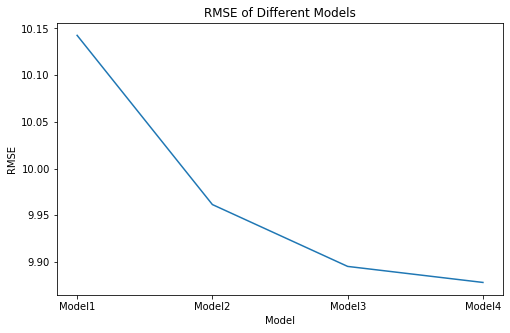

In [28]:
model1 = "w~ age + agesq"
model2 = "w~ age + agesq + grade92 + grade92sq"
model3 = "w~ age + agesq + grade92 + grade92sq + female"
model4 = "w~ age + agesq + grade92 + grade92sq + female + uhours + ownchild +  grade92* age + female*age + uhours*age + ownchild*age "
formulas = [model1, model2, model3, model4]

# make a figure of each RMSE using all samples in 4 models
rmse_results = pd.DataFrame(columns=['Model1', 'Model2', 'Model3', 'Model4'])

rmse_values = []
for formula in formulas:
    rmse_value = calc_rmse(formula, data, "HC0")
    rmse_values.append(rmse_value)

# add the result of calculation to the figure
rmse_results.loc[0] = rmse_values

# show result
print(rmse_results)

#plot with pd
models = ['Model1', 'Model2', 'Model3', 'Model4']
plt.figure(figsize=(8, 5))
plt.plot(models, rmse_values)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of Different Models')
plt.show()



### Comparing 4 models in liner regression with k-fold cross validation
This is the direct approach to find the best model. In k-fold cross validation, sample is randomly divided into test set and train set. This time, k is defined as 4. Model 3 shows the lowest figure, which means model3 can be the best for prediction without overfitting. 


In [21]:
from sklearn.model_selection import KFold
# define k as 4
k = KFold(n_splits=4, shuffle=False, random_state=None)

In [22]:
# make a function of cross validate OLS with combining sklearn k-fold cross validation and statsmodels ols formula
def cv_reg(formula, data, kfold, robustse=None):
    rmse_list = []

    # Calculating OLS for each fold
    for train_index, test_index in k.split(data):
        # make a train dataset and test dataset from the original sample
        data_train, data_test = data.iloc[train_index, :], data.iloc[test_index, :]
        if robustse is None:
            model = smf.ols(formula, data=data_train).fit()
        else:
            model = smf.ols(formula, data=data_train).fit(cov_type=robustse)
        rmse_list += [rmse(data_test[formula.split("~")[0]], model.predict(data_test))]

    return {
        "rmse": rmse_list,
    }


def summarize_cv(cvlist, stat="rmse"):
    # make a figure that illustrate RMSE in each model
    result = pd.DataFrame(
        {"Model" + str(x + 1): cvlist[x][stat] for x in range(len(cv_list))}
    )
    result["Resample"] = ["Fold" + str(x + 1) for x in range(len(cvlist[0]["rmse"]))]
    result = result.set_index("Resample")
    result = pd.concat([result, pd.DataFrame(result.mean(), columns=["Average"]).T])
    return result

In [23]:
# make list of cross validation of 4 models to calculate RMSE
cv1 = cv_reg("w~ age + agesq", data, k, "HC0")
cv2 = cv_reg("w~ age + agesq + grade92 + grade92sq", data, k, "HC0")
cv3 = cv_reg("w~ age + agesq + grade92 + grade92sq + female",data, k, "HC0")
cv4 = cv_reg("w~ age + agesq + grade92 + grade92sq + female + uhours + ownchild +  grade92* age + female*age + uhours*age + ownchild*age ", data, k, "HC0")
cv_list = [cv1, cv2, cv3, cv4]

In [24]:
summarize_cv(cv_list)

,Model1,Model2,Model3,Model4
Fold1,10.010594,9.741763,9.689723,9.701351
Fold2,12.388202,12.252362,12.207471,12.203284
Fold3,8.699050,8.637001,8.497963,8.516327
Fold4,9.109672,8.878014,8.850003,8.872851
Average,10.051879,9.877285,9.811290,9.823453


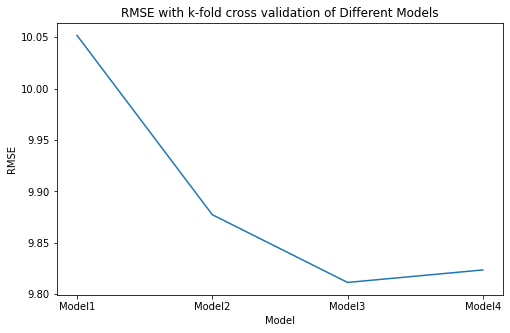

In [33]:
#plot with pd
plt.figure(figsize=(8, 5))
plt.plot(models, summarize_cv(cv_list).T["Average"])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE with k-fold cross validation of Different Models')
plt.show()


### Comparing 4 models in Bayesian Information Criterion(BIC)
BIC is one of good approaches to find indirectly the best model by test fit and penalty.
The result is the same as that in RMSE with cross validation; BIC of model 3 is the lowest, which means that model 3 can be the best model minimizing error in live data. Another point to is that in BIC and k-fold cross validation, the result from 4 models made a U curve by complexity.

In [25]:
reg1 = smf.ols("w ~ age + agesq", data=data).fit(cov_type="HC0")
reg2 = smf.ols("w ~ age + agesq + grade92 + grade92sq", data=data).fit(cov_type="HC0")
reg3 = smf.ols("w ~ age + agesq + grade92 + grade92sq + female", data=data).fit(cov_type="HC0")
reg4 = smf.ols("w ~ age + agesq + grade92 + grade92sq + female + uhours + ownchild +  grade92* age + female*age + uhours*age + ownchild*age ", data=data).fit(cov_type="HC0")

   BIC(Model1)  BIC(Model2)  BIC(Model3)  BIC(Model4)
0     32525.58     32385.51     32335.84      32371.0


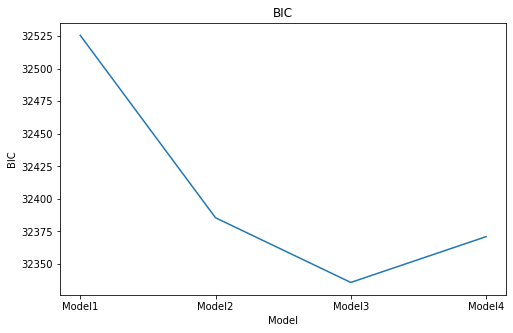

In [36]:
# make a figure of each BIC using all samples in 4 models
bic_results = pd.DataFrame(columns=['BIC(Model1)', 'BIC(Model2)', 'BIC(Model3)', 'BIC(Model4)'])
# calculate BIC of 4 models
bic = [round(x.bic, 2) for x in [reg1,reg2,reg3,reg4]]

# add the result of calculation to the figure
bic_results.loc[0] = bic

# show result
print(bic_results)

#plot with pd
plt.figure(figsize=(8, 5))
plt.plot(models, bic)
plt.xlabel('Model')
plt.ylabel('BIC')
plt.title('BIC')
plt.show()